In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import time
import numpy as np

In [2]:
from Hueristic_methods.Heuristic_Method import hueristic_Method 

In [3]:
# Load the dataset
train_file_path = "./datasets/Train_Pre_Processed_Dataset.csv"  # Replace with the path to your CSV file
train_data = pd.read_csv(train_file_path)

test_file_path = "./datasets/Test_Pre_Processed_Dataset.csv"  # Replace with the path to your CSV file
test_data = pd.read_csv(test_file_path)


In [4]:
#Define levels
levels=5

# Parse relevant columns for all bid and ask levels
bid_columns = [f"bids[{i}].price" for i in range(levels)] + [f"bids[{i}].amount" for i in range(levels)]
ask_columns = [f"asks[{i}].price" for i in range(levels)] + [f"asks[{i}].amount" for i in range(levels)]
feature_columns = bid_columns  + ask_columns + ['mark_price']
eval_columns=['mark_price','next_1st_mark_price','1st_Price_Movement',"1st_actual_direction"]

# Features and target
X_train = train_data[feature_columns]
y_train = train_data['next_1st_mark_price']
X_test = test_data[feature_columns]
y_test = test_data[eval_columns]
# X_eval = eval_data[feature_columns]
# y_eval = eval_data[eval_columns]

In [5]:
Heuristic_Method=hueristic_Method(X_train,X_test,levels)

In [6]:
# Predict 
# Measure the execution time of the function
start_time = time.time()
Heuristic_Predict_data=Heuristic_Method.predict()
end_time = time.time()
execution_time = (end_time - start_time)* 1000 
print(f"Execution_time(Heuristic_Method): {execution_time:.2f} milliseconds")

Execution_time(Heuristic_Method): 13275.64 milliseconds


In [7]:
def calculate_MSE(predict,actual):
    return mean_squared_error(actual["next_1st_mark_price"], predict["predicted_heuristic"])

def calculate_directional_accuracy(predict,actual):
    return (actual["1st_actual_direction"] == predict["predicted_direction_heuristic"]).mean()

def calculate_tolerancebased_accuracy(predict,actual):
     # Set tolerance to 0.01% of average price
    tolerance = 0.0001 * actual["next_1st_mark_price"].mean() 
    tolerance_heuristic=abs(predict["predicted_heuristic"] - actual["next_1st_mark_price"]) <= tolerance
    return tolerance_heuristic.mean()


In [9]:
# Finding the best parameter
# best_MSE=float('inf')
# best_directional_accuracy=0.0
# best_tolerance_accuracy=0.0

# best_MSE_imbalance_high=0
# best_MSE_imbalance_low=0
# best_MSE_fraction_spread_upward=0
# best_MSE_fraction_spread_downward=0

# best_directional_accuracy_imbalance_high=0
# best_directional_accuracy_imbalance_low=0
# best_directional_accuracy_fraction_spread_upward=0
# best_directional_accuracy_fraction_spread_downward=0

# best_tolerance_accuracy_imbalance_high=0
# best_tolerance_accuracy_imbalance_low=0
# best_tolerance_accuracy_fraction_spread_upward=0
# best_tolerance_accuracy_fraction_spread_downward=0


# for imbalance_high in  np.arange(0.5,0.9,0.1):
# # for imbalance_high in  range(0,1):
#     for imbalance_low in  np.arange(0,0.5,0.1):
#     # for imbalance_low in  range(0,1):
#         for fraction_spread_upward in  np.arange(0,0.5,0.1):
#         # for fraction_spread_upward in  range(0,1):
#             for fraction_spread_downward in  np.arange(0,0.5,0.1):
#             # for fraction_spread_downward in  range(0,1):
#                 Heuristic_Predict_data=Heuristic_Method.predict(imbalance_high,imbalance_low,fraction_spread_upward, fraction_spread_downward)
#                 mse=calculate_MSE(Heuristic_Predict_data,y_test)
#                 directional_accuracy=calculate_directional_accuracy(Heuristic_Predict_data,y_test)
#                 tolerancebased_accuracy=calculate_tolerancebased_accuracy(Heuristic_Predict_data,y_test)
#                 if mse<best_MSE:
#                     best_MSE=mse
#                     best_MSE_imbalance_high=imbalance_high
#                     best_MSE_imbalance_low=imbalance_low
#                     best_MSE_fraction_spread_upward=fraction_spread_upward
#                     best_MSE_fraction_spread_downward=fraction_spread_downward

#                 if directional_accuracy>best_directional_accuracy:
#                     best_directional_accuracy=directional_accuracy
#                     best_directional_accuracy_imbalance_high=imbalance_high
#                     best_directional_accuracy_imbalance_low=imbalance_low
#                     best_directional_accuracy_fraction_spread_upward=fraction_spread_upward
#                     best_directional_accuracy_fraction_spread_downward=fraction_spread_downward

#                 if tolerancebased_accuracy>best_tolerance_accuracy:
#                     best_tolerance_accuracy=tolerancebased_accuracy
#                     best_tolerance_accuracy_imbalance_high=imbalance_high
#                     best_tolerance_accuracy_imbalance_low=imbalance_low
#                     best_tolerance_accuracy_fraction_spread_upward=fraction_spread_upward
#                     best_tolerance_accuracy_fraction_spread_downward=fraction_spread_downward

# print("best_MSE: ", best_MSE)
# print("best_MSE_imbalance_high ", best_MSE_imbalance_high)
# print("best_MSE_imbalance_low: ", best_MSE_imbalance_low)
# print("best_MSE_fraction_spread_upward: ", best_MSE_fraction_spread_upward)
# print("best_MSE_fraction_spread_downward: ", best_MSE_fraction_spread_downward)

# print("best_directional_accuracy: ", best_directional_accuracy)
# print("best_directional_accuracy_imbalance_high ", best_directional_accuracy_imbalance_high)
# print("best_directional_accuracy_imbalance_low: ", best_directional_accuracy_imbalance_low)
# print("best_directional_accuracy_fraction_spread_upward: ", best_directional_accuracy_fraction_spread_upward)
# print("best_directional_accuracy_fraction_spread_downward: ", best_directional_accuracy_fraction_spread_downward)

# print("best_tolerance_accuracy: ", best_tolerance_accuracy)
# print("best_tolerance_accuracy_imbalance_high ", best_tolerance_accuracy_imbalance_high)
# print("best_tolerance_accuracy_imbalance_low: ", best_tolerance_accuracy_imbalance_low)
# print("best_tolerance_accuracy_fraction_spread_upward: ", best_tolerance_accuracy_fraction_spread_upward)
# print("best_tolerance_accuracy_fraction_spread_downward: ", best_tolerance_accuracy_fraction_spread_downward)


In [11]:
# combine data tgt
Evaluate_result=pd.concat([y_test, Heuristic_Predict_data], axis=1)

In [12]:
# Evaluate performance (Mean Squared Error) based on mark price
mse = mean_squared_error(Evaluate_result["next_1st_mark_price"], Evaluate_result["predicted_heuristic"])
print(f"Heuristic Methods MSE (Eval Set): {mse:.2f}")

Heuristic Methods MSE (Eval Set): 1.89


In [13]:
# Calculate directional accuracy
# Evaluate_result.loc[:, "predicted_direction_heuristic"] = np.sign(Evaluate_result["predicted_heuristic"] - Evaluate_result["next_mark_price"])
directional_accuracy_heuristic = (Evaluate_result["1st_actual_direction"] == Evaluate_result["predicted_direction_heuristic"]).mean()
print(f"Directional Accuracy (heuristic): {directional_accuracy_heuristic:.2%}")

Directional Accuracy (heuristic): 39.13%


In [14]:
# Tolerance-Based Accuracy
tolerance = 0.0001 * Evaluate_result["next_1st_mark_price"].mean()  # Set tolerance to 0.01% of average price
Evaluate_result.loc[:, "tolerance_heuristic"] = abs(Evaluate_result["predicted_heuristic"] - Evaluate_result["next_1st_mark_price"]) <= tolerance

# Calculate tolerance-based accuracy
tolerance_accuracy_heuristic = Evaluate_result["tolerance_heuristic"].mean()
print(f"Tolerance-Based Accuracy (heuristic): {tolerance_accuracy_heuristic:.2%}")

Tolerance-Based Accuracy (heuristic): 98.86%


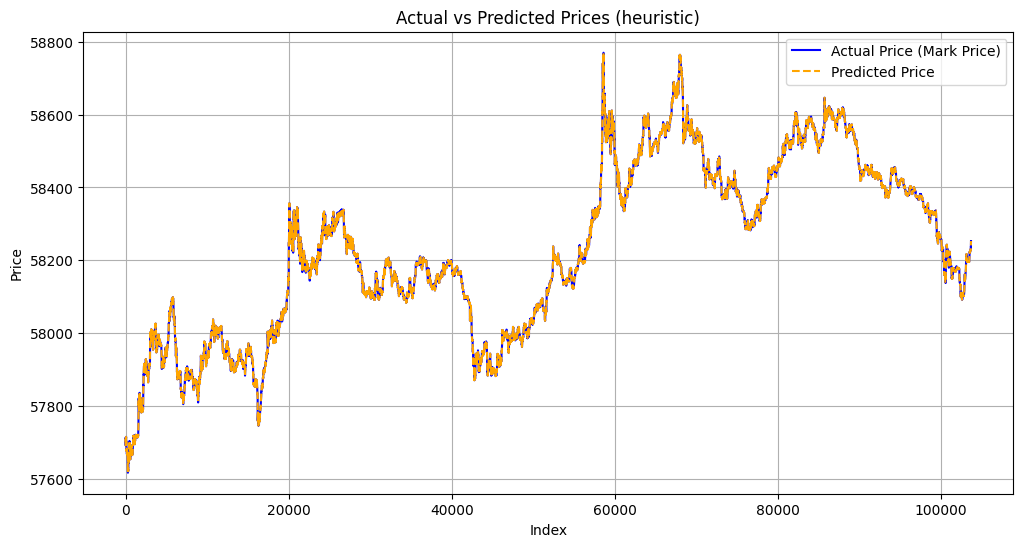

In [15]:
# Visualize the actual vs. predicted price along with signals
plt.figure(figsize=(12, 6))
plt.plot(Evaluate_result["mark_price"], label="Actual Price (Mark Price)", color="blue")
plt.plot(Evaluate_result["predicted_heuristic"], label="Predicted Price", color="orange", linestyle="--")
plt.title("Actual vs Predicted Prices (heuristic)")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


In [18]:
# # Add signal distribution visualization
# direction_mapping = {1: "up", 0: "stable", -1: "down"}
# Evaluate_result["predicted_movement_heuristic"] = Evaluate_result["predicted_direction_heuristic"].map(direction_mapping)
# Predict_signal_counts = Evaluate_result["predicted_movement_heuristic"].value_counts()
# Actual_signal_counts = Evaluate_result["1st_Price_Movement"].value_counts()

# labels = Predict_signal_counts.index.tolist()
# heuristic_predict_values = Predict_signal_counts.values.tolist()
# actual_values = Actual_signal_counts.values.tolist()

# # Setting the positions and width for the bars
# positions = np.arange(len(labels))
# bar_width = 0.35

# # Create the bar plot
# bar1=plt.bar(positions , actual_values, bar_width, label='Actual Signal', color='orange', alpha=0.7)
# bar2=plt.bar(positions+ bar_width, heuristic_predict_values, bar_width, label='Predicted Signal', color='b', alpha=0.7)

# # Adding labels, title, and legend
# plt.xlabel('Labels')
# plt.ylabel('Counts')
# plt.title('Predicted vs Actual Signal Counts (heuristic)')
# plt.xticks(positions + bar_width / 2, labels)
# plt.legend()

# # Displaying the values on top of each bar
# for bar in bar1 + bar2:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')


# plt.show()